In [1]:
# import thư viện numpy
import numpy as np
# import thư viện matplotlib
import matplotlib.pyplot as plt
import scipy.sparse as sp


# Tải dữ liệu data X và y đã được xử lý thành ma trận
labels = np.load('D:/Document/Machine_Learning/CS3/label.npy') 
features = sp.load_npz('D:/Document/Machine_Learning/CS3/tfidf.npz')

def add_bias(features, labels):
    '''
    features là ma trận N*X với N là số datapoint, X là số term trong dictionary
    labels là ma trận N*1 với N là số datapoint
    
    Hàm trả về ma trận features(sau khi đã thêm 1 cột bias giá trị 1 cho tất cả các phần tử) và labels
    '''
    # Thêm cột giá trị bias cho dữ liệu
    labels_final = sp.csr_matrix(labels, shape = (1, len(labels)))
    matrix_ones = sp.csc_matrix((26709,1),dtype=np.float)
    matrix_ones[:]=1
    matrix_final_features= sp.csc_matrix(sp.hstack((features,matrix_ones)))
    return matrix_final_features, labels_final

# chia Train và test
matrix_final_features, labels_final = add_bias(features, labels)
X_Train = matrix_final_features[:20000]
X_test = matrix_final_features[20000:]
y_Train = labels_final.T[:20000]
y_test = labels_final.T[20000:]

D:\Anaconda3\envs\Nguyen\lib\site-packages\scipy\sparse\compressed.py:746: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


In [2]:
print('X_Train:', type(X_Train), X_Train.shape)

X_Train: <class 'scipy.sparse.csc.csc_matrix'> (20000, 28901)


In [3]:
def sigmoid(z):
    # hàm sigmoid
    '''
    z là model đầu ra Linear Regression
    np.exp là e mũ
    Hàm trả về sigmoid của z
    
    '''
    return 1/(1+np.exp(-z))

In [4]:
def Cost_Function(w, y, X):
    '''
    w là ma trận bộ tham số có shape bằng shape X
    X là features
    y là y labels
    Hàm trả về cost tương ứng bộ tham số w
    
    '''
    # tính giá trị đầu ra của hàm Linear Regression
    s = X.dot(w).toarray()
    # scale s về khoảng [0,1] dùng hàm sigmoid
    # z là xác xuất điểm dữ liệu rơi vào lớp y
    z = sigmoid(s)
    y = y.toarray()
    
    cost = -np.sum((y*(np.log(z)) + (1-y)*np.log(1-z)))
    
    return cost

In [6]:
def Derivative(w, y, X):
    '''
    W là ma trận bộ trọng số w: (28901, 1)  <class 'scipy.sparse.csc.csc_matrix'>
    y là dữ liệu labels y: (1, 1) <class 'scipy.sparse.csc.csc_matrix'>
    X là dữ liệu Train X: (28901, 1) <class 'scipy.sparse.csr.csr_matrix'>
    
    Hàm trả về giá trị đạo hàm cho từng feature
    '''
    # tính giá trị đầu ra của hàm Linear Regression
    s = X.dot(w).toarray()
    # scale s về khoảng [0,1] dùng hàm sigmoid
    # z là xác xuất điểm dữ liệu rơi vào lớp y
    z = sigmoid(s)
    y = y.toarray()
#     print('z',z.shape, type(z))
#     print('y',y.shape, type(y))
#     print('X',X.shape, type(X))
    der = (z-y).T
    
    X = X.T
#     print(X.shape, type(X))
    der = sp.csr_matrix(der, shape = (1,der.shape[1]))
    der = der.T
#     print(der.shape, type(der))
    
    return X.dot(der)

In [19]:
alpha = 0.001
# Khởi tạo ma trận biến với giá trị khởi tạo tại mỗi phần tử là 0
w = np.zeros((X_Train.shape[1], 1))
w = sp.csc_matrix(w, shape = (len(w),1))
# Khởi tạo learning rate

epoch =  0 cost =  176.1934862550946
epoch =  500 cost =  175.8496954071773
epoch =  1000 cost =  175.50732625156584
epoch =  1500 cost =  175.16637008895972
epoch =  2000 cost =  174.82681829182025
epoch =  2500 cost =  174.4886623036007
epoch =  3000 cost =  174.15189363798683
epoch =  3500 cost =  173.81650387814665
epoch =  4000 cost =  173.482484675991
epoch =  4500 cost =  173.14982775144313
epoch =  5000 cost =  172.8185248917181
epoch =  5500 cost =  172.48856795061192
epoch =  6000 cost =  172.15994884779954
epoch =  6500 cost =  171.83265956814222
epoch =  7000 cost =  171.50669216100403
epoch =  7500 cost =  171.18203873957714
epoch =  8000 cost =  170.85869148021595
epoch =  8500 cost =  170.5366426217796
epoch =  9000 cost =  170.21588446498362
epoch =  9500 cost =  169.8964093717593


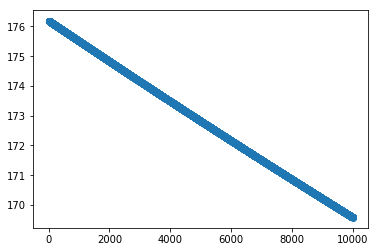

In [43]:
# list chứa tất cả mse
all_Cost = []

# Khởi tạo số vòng lặp
num = 10000
# Huấn luyện
for i in range(num):
    # Tính cost với w hiện thời
    err = Cost_Function(w, y_Train, X_Train)
    all_Cost.append(err)
    # Cập nhật w theo công thức gradient descent
    der = Derivative(w, y_Train, X_Train)
    w = w - alpha*der 
    
    if i % 500 == 0:
        # In ra cost tại vòng lặp thứ i
        print("epoch = ", i, "cost = ",Cost_Function(w, y_Train, X_Train))
    
   


        
# Vẽ đồ thị biễu diễn cost qua từng vòng lặp
axis_x = list(range(num))
axis_y = all_Cost
plt.scatter(axis_x, axis_y)
plt.show()

In [45]:
sp.save_npz('D:/Document/Machine_Learning/CS3/w.npz', w)